In [1]:
import numpy
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.recurrent import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import aux_func as f


Using Theano backend.


In [30]:
feature_dim = 1
look_back = 0
data_file = 'abelha-only-press.csv'
data_use_percent = 1

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = pandas.read_csv(data_file, engine='python')

dataset = dataframe.values
#resizing dataset len for faster tests 
dataset = dataset[:int(len(dataset)*data_use_percent)]
dataset = dataset.astype('float32')

In [31]:
dataframe.head(5)

,press,act
0,1010.1,0.023
1,1009.5,0.028
2,1009.6,0.092
3,1009.6,0.161
4,1009.9,0.276


 Train Score: 0.523923 RMSE
 Test Score: 0.542433 RMSE


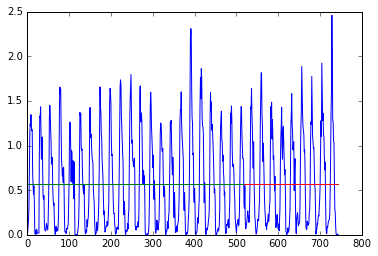

In [32]:
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


trainX, trainY = f.create_dataset(train, feature_dim, look_back)
testX, testY = f.create_dataset(test, feature_dim, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the GRU network
model = f.baseline_model(feature_dim + look_back)
model.fit(trainX, trainY, nb_epoch=500, verbose=0)


trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print(' Train Score: %.6f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print(' Test Score: %.6f RMSE' % (testScore))
f.g_plot(dataset,trainPredict, testPredict, feature_dim, look_back)


<h1>Normalizando a Feature</h1>
<p> teste de parágrafo

In [10]:
old_act = dataframe['act']
dataframe2 = (dataframe - dataframe.min())/(dataframe.max() - dataframe.min())

dataframe2['act'] = old_act

dataframe2.head(5)

,press,act
0,0.585714,0.023
1,0.500000,0.028
2,0.514286,0.092
3,0.514286,0.161
4,0.557143,0.276


 Train Score: 0.518452 RMSE
 Test Score: 0.537277 RMSE


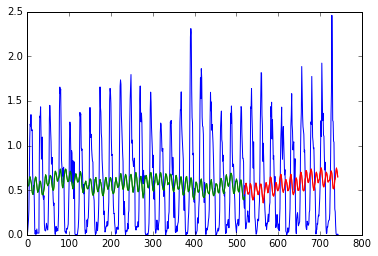

In [11]:
dataset2 = dataframe2.values
#resizing dataset len for faster tests 
dataset2 = dataset2[:int(len(dataset2)*data_use_percent)]
dataset2 = dataset2.astype('float32')

# split into train and test sets
train_size = int(len(dataset2) * 0.70)
test_size = len(dataset2) - train_size
train, test = dataset2[0:train_size,:], dataset2[train_size:len(dataset),:]


trainX, trainY = f.create_dataset(train, feature_dim, look_back)
testX, testY = f.create_dataset(test, feature_dim, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = f.baseline_model(feature_dim + look_back)
model.fit(trainX, trainY, nb_epoch=500, verbose=0)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print(' Train Score: %.6f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print(' Test Score: %.6f RMSE' % (testScore))

f.g_plot(dataset2,trainPredict, testPredict, feature_dim, look_back)

<h1>Apenas Temperatura</h1>

In [26]:
feature_dim = 1
look_back = 0
data_file = 'abelha-only-temp.csv'
data_use_percent = 1

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = pandas.read_csv(data_file, engine='python')

dataset = dataframe.values
#resizing dataset len for faster tests 
dataset = dataset[:int(len(dataset)*data_use_percent)]
dataset = dataset.astype('float32')
dataframe.head(5)

,temp,act
0,22.9,0.023
1,22.8,0.028
2,22.9,0.092
3,22.6,0.161
4,22.9,0.276


 Train Score: 0.412006 RMSE
 Test Score: 0.347369 RMSE


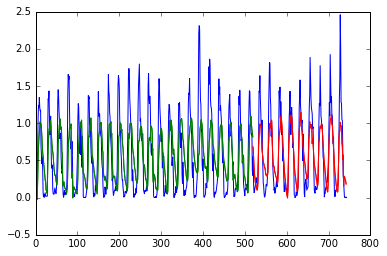

In [27]:
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


trainX, trainY = f.create_dataset(train, feature_dim, look_back)
testX, testY = f.create_dataset(test, feature_dim, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the GRU network
model = f.baseline_model(feature_dim + look_back)
model.fit(trainX, trainY, nb_epoch=500, verbose=0)


trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print(' Train Score: %.6f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print(' Test Score: %.6f RMSE' % (testScore))
f.g_plot(dataset,trainPredict, testPredict, feature_dim, look_back)


In [28]:
old_act = dataframe['act']
dataframe2 = (dataframe - dataframe.min())/(dataframe.max() - dataframe.min())

dataframe2['act'] = old_act

dataframe2.head(5)

,temp,act
0,0.026549,0.023
1,0.017699,0.028
2,0.026549,0.092
3,0.000000,0.161
4,0.026549,0.276


 Train Score: 0.410451 RMSE
 Test Score: 0.347097 RMSE


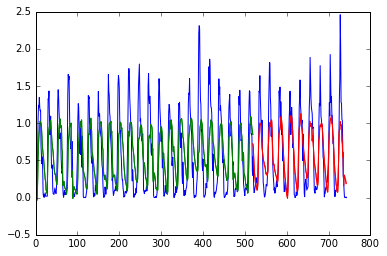

In [29]:
dataset2 = dataframe2.values
#resizing dataset len for faster tests 
dataset2 = dataset2[:int(len(dataset2)*data_use_percent)]
dataset2 = dataset2.astype('float32')

# split into train and test sets
train_size = int(len(dataset2) * 0.70)
test_size = len(dataset2) - train_size
train, test = dataset2[0:train_size,:], dataset2[train_size:len(dataset),:]


trainX, trainY = f.create_dataset(train, feature_dim, look_back)
testX, testY = f.create_dataset(test, feature_dim, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = f.baseline_model(feature_dim + look_back)
model.fit(trainX, trainY, nb_epoch=500, verbose=0)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print(' Train Score: %.6f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print(' Test Score: %.6f RMSE' % (testScore))

f.g_plot(dataset2,trainPredict, testPredict, feature_dim, look_back)

<h1> Agora apenas com radiação</h1>

In [19]:
feature_dim = 1
look_back = 0
data_file = 'abelha-only-rad.csv'
data_use_percent = 1

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = pandas.read_csv(data_file, engine='python')

dataset = dataframe.values
#resizing dataset len for faster tests 
dataset = dataset[:int(len(dataset)*data_use_percent)]
dataset = dataset.astype('float32')
dataframe.head(5)

,rad,act
0,-3.54,0.023
1,-3.54,0.028
2,-3.54,0.092
3,-3.54,0.161
4,33.98,0.276


 Train Score: 0.286377 RMSE
 Test Score: 0.266773 RMSE


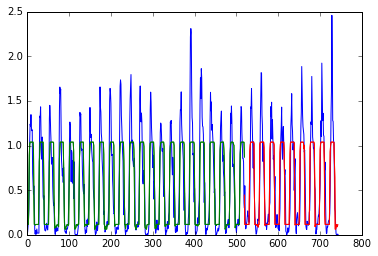

In [20]:
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


trainX, trainY = f.create_dataset(train, feature_dim, look_back)
testX, testY = f.create_dataset(test, feature_dim, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the GRU network
model = f.baseline_model(feature_dim + look_back)
model.fit(trainX, trainY, nb_epoch=500, verbose=0)


trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print(' Train Score: %.6f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print(' Test Score: %.6f RMSE' % (testScore))
f.g_plot(dataset,trainPredict, testPredict, feature_dim, look_back)


In [21]:
old_act = dataframe['act']
dataframe2 = (dataframe - dataframe.min())/(dataframe.max() - dataframe.min())

dataframe2['act'] = old_act

dataframe2.head(5)

,rad,act
0,0.000000,0.023
1,0.000000,0.028
2,0.000000,0.092
3,0.000000,0.161
4,0.011469,0.276


 Train Score: 0.294064 RMSE
 Test Score: 0.287480 RMSE


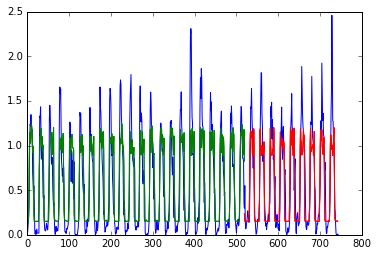

In [22]:
dataset2 = dataframe2.values
#resizing dataset len for faster tests 
dataset2 = dataset2[:int(len(dataset2)*data_use_percent)]
dataset2 = dataset2.astype('float32')

# split into train and test sets
train_size = int(len(dataset2) * 0.70)
test_size = len(dataset2) - train_size
train, test = dataset2[0:train_size,:], dataset2[train_size:len(dataset),:]


trainX, trainY = f.create_dataset(train, feature_dim, look_back)
testX, testY = f.create_dataset(test, feature_dim, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = f.baseline_model(feature_dim + look_back)
model.fit(trainX, trainY, nb_epoch=500, verbose=0)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print(' Train Score: %.6f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print(' Test Score: %.6f RMSE' % (testScore))

f.g_plot(dataset2,trainPredict, testPredict, feature_dim, look_back)